<a href="https://colab.research.google.com/github/PhanQuangHuy123/B-i-1_AI_-Phan-Quang-Huy-20146254/blob/main/W4_25_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=676094273974f35e5784f13c3457c79784b852b31681b2d72b4b8f9c5bc863af
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


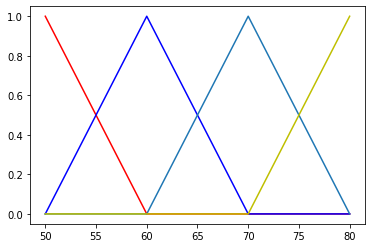

In [ ]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange (50,81,1)
slow = fuzz .trimf(x,[50,50,60])
medium = fuzz.trimf(x,[50,60,70])
medium_fast = fuzz.trimf(x,[60,70,80])
full_speed = fuzz.trimf(x,[70,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5, label="slow")
plt.plot(x,medium,'b',linewidth = 1.5, label="slow")
plt.plot(x,medium_fast,linewidth = 1.5, label="slow")
plt.plot(x,full_speed,'y',linewidth = 1.5, label="slow")

18.24390243902438


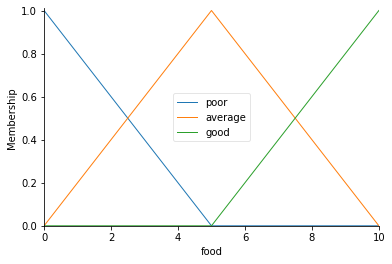

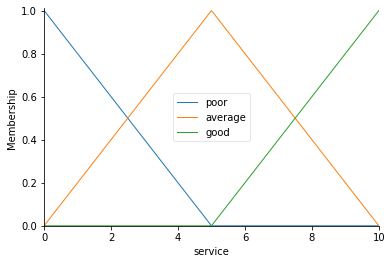

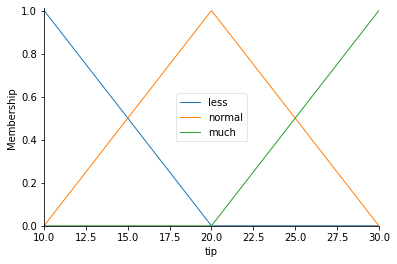

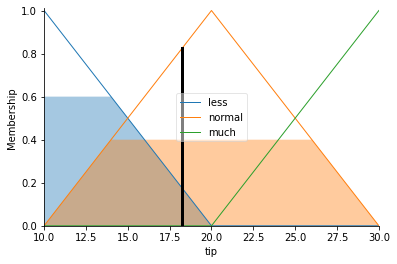

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),"food")
service = ctrl.Antecedent(np.arange(0,11,1),"service")
tip = ctrl.Consequent(np.arange(10,31,1),"tip")

food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[0,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
service['average'].view

rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['normal']) 
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['normal']) 
rule7 = ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])  


#
tipping_ctrl = ctrl.ControlSystem([rule1 , rule2 , rule3 , rule4 , rule5 , rule6 , rule7 , rule8 ,rule9])
tipping  = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=5
tipping.input['service']=2
tipping .compute()
print(tipping.output['tip'])
tip.view(sim=tipping)
                                  

                          

63.67424242424243


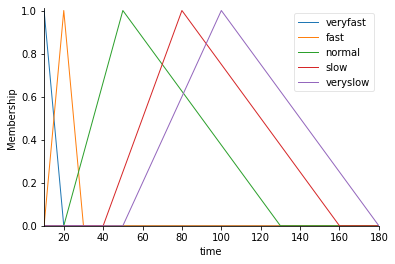

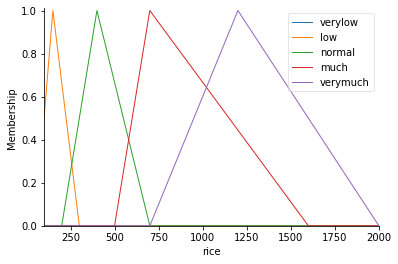

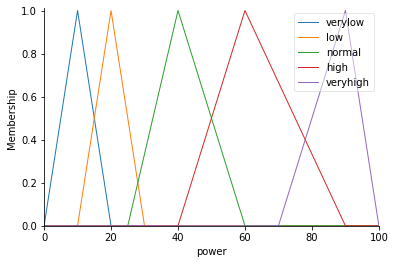

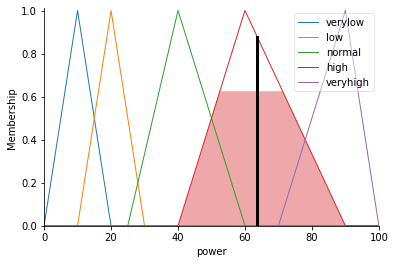

In [14]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,181,1),"time")
rice = ctrl.Antecedent(np.arange(100,2001,1),"rice")
power = ctrl.Consequent(np.arange(0,101,1),"power")
time['veryfast']= fuzz.trimf(time.universe,[10,10,20])
time['fast']= fuzz.trimf(time.universe,[10,20,30])
time['normal']=fuzz.trimf(time.universe,[20,50,130])
time['slow']= fuzz.trimf(time.universe,[40,80,160])
time['veryslow']= fuzz.trimf(time.universe,[50,100,180])
rice['verylow']= fuzz.trimf(rice.universe,[0,50,100])
rice['low']= fuzz.trimf(rice.universe,[50,150,300])
rice['normal']= fuzz.trimf(rice.universe,[200,400,700])
rice['much']= fuzz.trimf(rice.universe,[500,700,1600])
rice['verymuch']= fuzz.trimf(rice.universe,[700,1200,2000])
power['verylow']= fuzz.trimf(power.universe,[0,10,20])
power['low']= fuzz.trimf(power.universe,[10,20,30])
power['normal']= fuzz.trimf(power.universe,[25,40,60])
power['high']= fuzz.trimf(power.universe,[40,60,90])
power['veryhigh']= fuzz.trimf(power.universe,[70,90,100])

time.view()
rice.view()
power.view()



rule1 = ctrl.Rule(time['veryslow']&rice['verylow'],power['verylow']) 
rule2 = ctrl.Rule(time['veryslow']&rice['low'],power['low'])  
rule3 = ctrl.Rule(time['veryslow']&rice['normal'],power['low'])
rule4 = ctrl.Rule(time['veryslow']&rice['much'],power['high'])
rule5 = ctrl.Rule(time['veryslow']&rice['verymuch'],power['veryhigh'])
rule6 = ctrl.Rule(time['slow']&rice['verylow'],power['low'])
rule7 = ctrl.Rule(time['slow']&rice['low'],power['low'])
rule8 = ctrl.Rule(time['slow']&rice['normal'],power['normal'])
rule9 = ctrl.Rule(time['slow']&rice['much'],power['high'])
rule10 = ctrl.Rule(time['slow']&rice['verymuch'],power['high'])
rule11 = ctrl.Rule(time['normal']&rice['verylow'],power['normal'])
rule12 = ctrl.Rule(time['normal']&rice['low'],power['normal'])
rule13 = ctrl.Rule(time['normal']&rice['normal'],power['normal'])
rule14 = ctrl.Rule(time['normal']&rice['much'],power['high'])
rule15 = ctrl.Rule(time['normal']&rice['verymuch'],power['high'])
rule16 = ctrl.Rule(time['fast']&rice['verylow'],power['high'])
rule17 = ctrl.Rule(time['fast']&rice['low'],power['high'])
rule18 = ctrl.Rule(time['fast']&rice['normal'],power['high'])
rule19 = ctrl.Rule(time['fast']&rice['much'],power['high'])
rule20 = ctrl.Rule(time['fast']&rice['verymuch'],power['veryhigh'])
rule21 = ctrl.Rule(time['veryfast']&rice['verylow'],power['veryhigh'])
rule22 = ctrl.Rule(time['veryfast']&rice['low'],power['veryhigh'])
rule23 = ctrl.Rule(time['veryfast']&rice['normal'],power['high'])
rule24 = ctrl.Rule(time['veryfast']&rice['much'],power['veryhigh'])
rule25 = ctrl.Rule(time['veryfast']&rice['verymuch'],power['veryhigh'])


powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering  = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time']=50
powering.input['rice']=1500
powering .compute()
print(powering.output['power'])
power.view(sim=powering)
